# Inline Bayesian Linear Regression

In [29]:
"""
Inline Bayesian Linear Regression
---------------------------------
Figure 8.1

An example showing the online nature of Bayesian regression. The upper panel
shows the four points used in regression, drawn from the line
y = theta_1 x + theta_0 with theta_1 = 1 and theta_0 = 0. The lower panel shows
the posterior pdf in the (theta_1, theta_0) plane as each point is added in
sequence. For clarity, the implied dark regions for sigma > 3 have been
removed. The fourth point is an upper-limit measurement of y, and the resulting
posterior cuts off half the parameter space.
"""

'\nInline Bayesian Linear Regression\n---------------------------------\nFigure 8.1\n\nAn example showing the online nature of Bayesian regression. The upper panel\nshows the four points used in regression, drawn from the line\ny = theta_1 x + theta_0 with theta_1 = 1 and theta_0 = 0. The lower panel shows\nthe posterior pdf in the (theta_1, theta_0) plane as each point is added in\nsequence. For clarity, the implied dark regions for sigma > 3 have been\nremoved. The fourth point is an upper-limit measurement of y, and the resulting\nposterior cuts off half the parameter space.\n'

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev
%matplotlib inline

In [31]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [32]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [33]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [34]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

# Set up the data and errors

In [35]:
# Set up the data and errors
np.random.seed(13)
a = 1
b = 0

x = np.array([-1, 0.44, -0.16])
y = a * x + b
dy = np.array([0.25, 0.22, 0.2])

y = np.random.normal(y, dy)

# add a fourth point which is a lower bound
x4 = 1.0
y4 = a * x4 + b + 0.2

In [48]:
x

array([-1.  ,  0.44, -0.16])

In [49]:
y

array([-1.17809767,  0.6058286 , -0.16890062])

# Compute the likelihoods for each point

In [40]:
#------------------------------------------------------------
# Compute the likelihoods for each point
a_range = np.linspace(0, 2, 80)
b_range = np.linspace(-1, 1, 80)
logL = -((a_range[:, None, None] * x + b_range[None, :, None] - y) / dy) ** 2
sigma = [convert_to_stdev(logL[:, :, i]) for i in range(3)]


In [51]:
x.shape

(3,)

In [52]:
y.shape

(3,)

In [55]:
dy.shape

(3,)

In [50]:
# grid of (80 x 80) bins of a,b values, for each x point 
logL.shape

(80, 80, 3)

In [45]:
a_range[:,None,None].shape

(80, 1, 1)

In [54]:
(a_range[:,None,None]*x).shape

(80, 1, 3)

In [47]:
b_range[None, :, None].shape

(1, 80, 1)

In [42]:
logL.shape

(80, 80, 3)

In [60]:
# one sigma array per point
len(sigma)

3

In [58]:
sigma[0].shape

(80, 80)

In [61]:
convert_to_stdev(0.5)

array(1.)

# compute best-fit from first three points

In [37]:
# compute best-fit from first three points
logL_together = logL.sum(-1)
i, j = np.where(logL_together == np.max(logL_together))
amax = a_range[i[0]]
bmax = b_range[j[0]]

In [62]:
logL.sum()

-186917.68494768292

In [64]:
# sum of the 3 points in each bin
logL.sum(-1).shape

(80, 80)

In [71]:
a_range.shape

(80,)

In [68]:
amax

1.240506329113924

In [69]:
bmax

0.03797468354430378

# Plot the first figure: the points and errorbars

(-2.0, 2.0)

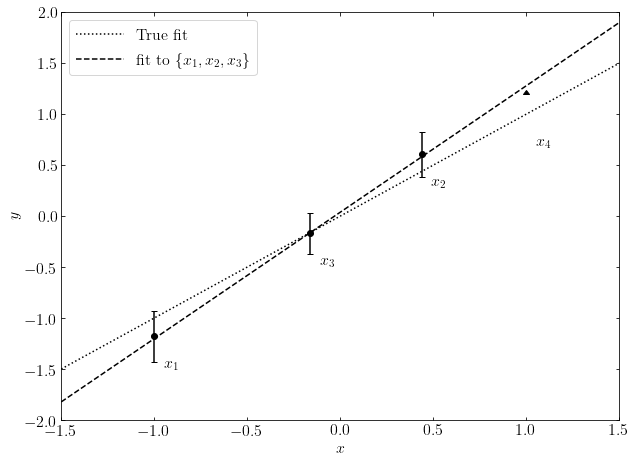

In [38]:
#------------------------------------------------------------
# Plot the first figure: the points and errorbars
fig1 = plt.figure(figsize=(10, 7.5))
ax1 = fig1.add_subplot(111)

# Draw the true and best-fit lines
xfit = np.array([-1.5, 1.5])
ax1.plot(xfit, a * xfit + b, ':k', label='True fit')
ax1.plot(xfit, amax * xfit + bmax, '--k', label='fit to $\{x_1, x_2, x_3\}$')

ax1.legend(loc=2)

ax1.errorbar(x, y, dy, fmt='ok')
ax1.errorbar([x4], [y4], [[0.5], [0]], fmt='_k', lolims=True)

for i in range(3):
    ax1.text(x[i] + 0.05, y[i] - 0.3, "$x_{%i}$" % (i + 1))
ax1.text(x4 + 0.05, y4 - 0.5, "$x_4$")

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-2, 2)

# Plot the second figure: likelihoods for each point

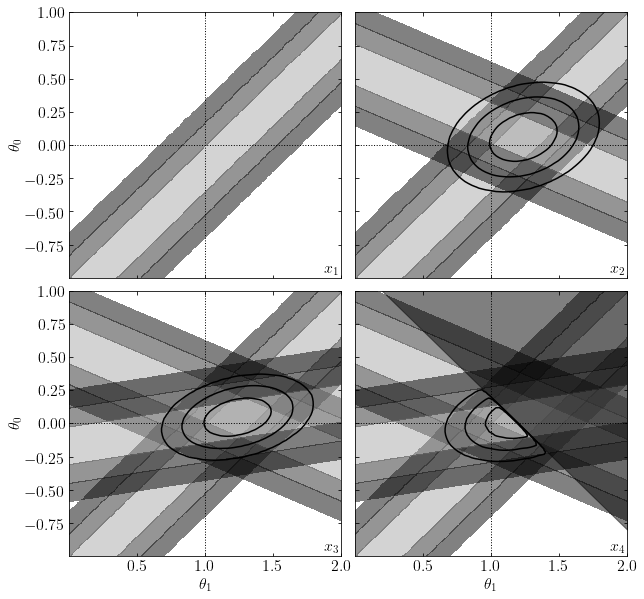

In [39]:
#------------------------------------------------------------
# Plot the second figure: likelihoods for each point
fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.05, wspace=0.05)

# plot likelihood contours
for i in range(4):
    ax = fig2.add_subplot(221 + i)
    for j in range(min(i + 1, 3)):
        ax.contourf(a_range, b_range, sigma[j].T,
                    levels=(0, 0.683, 0.955, 0.997),
                    cmap=plt.cm.binary, alpha=0.5)

# plot the excluded area from the fourth point
axpb = a_range[:, None] * x4 + b_range[None, :]
mask = y4 < axpb
fig2.axes[3].fill_between(a_range, y4 - x4 * a_range, 2, color='k', alpha=0.5)

# plot ellipses
for i in range(1, 4):
    ax = fig2.axes[i]
    logL_together = logL[:, :, :i + 1].sum(-1)
    if i == 3:
        logL_together[mask] = -np.inf

    sigma_together = convert_to_stdev(logL_together)

    ax.contour(a_range, b_range, sigma_together.T,
               levels=(0.683, 0.955, 0.997),
               colors='k')

# Label and adjust axes
for i in range(4):
    ax = fig2.axes[i]

    ax.text(1.98, -0.98, "$x_{%i}$" % (i + 1), ha='right', va='bottom')

    ax.plot([0, 2], [0, 0], ':k', lw=1)
    ax.plot([1, 1], [-1, 1], ':k', lw=1)

    ax.set_xlim(0.001, 2)
    ax.set_ylim(-0.999, 1)

    if i in (1, 3):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 1):
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 2):
        ax.set_ylabel(r'$\theta_0$')
    if i in (2, 3):
        ax.set_xlabel(r'$\theta_1$')


plt.show()
